In [4]:
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nilearn
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [6]:
# Importing Dataset

from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure

data = fetch_abide_pcp(derivatives=['rois_ez'], SITE_ID=['NYU']) # Extracting fMRI data from NYU repository wrt AAL atlas

In [7]:
# Pre-processing the data

conn_est = ConnectivityMeasure(kind='correlation') # Connectivity Estimator
conn_matrices = conn_est.fit_transform(data['rois_ez'])

In [8]:
# conn_matrices is a matrix that contains the correlation of different ROIs for each sample
# conn_matrices[i][j][k] -> correlation between ROI j and ROI k for subject i

# It is to note that connectivity matrices are symmetric matrices. Let flatten this matrix into a vector

sym_vec_matrices = [conn_matrix[np.triu_indices_from(conn_matrix, k=1)] for conn_matrix in conn_matrices]# Converting sym. matrix into vector
X=sym_vec_matrices
#print(X.shape)

In [9]:
y = data.phenotypic['DX_GROUP']
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [11]:
y[y == 2] = -1
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


In [12]:
from sklearn.model_selection import cross_validate

In [13]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
n_neighbors = list(range(1, 51))

In [14]:
# First, we go with Manhattan distance (p = 1)

acc = []
K = []
for k in range(1, 51):
    K.append(k)
    clf = KNN(n_neighbors=k, p=1)
    cv_results = cross_validate(clf, X, y, cv=5)
    score = np.mean(cv_results['test_score'])
    acc.append(score)

In [15]:
# First, we go with Euclidean distance (p = 2)

acc_ = []
K_ = []
for k in range(1, 51):
    K_.append(k)
    clf = KNN(n_neighbors=k, p=2)
    cv_results = cross_validate(clf, X, y, cv=5)
    score = np.mean(cv_results['test_score'])
    acc_.append(score)


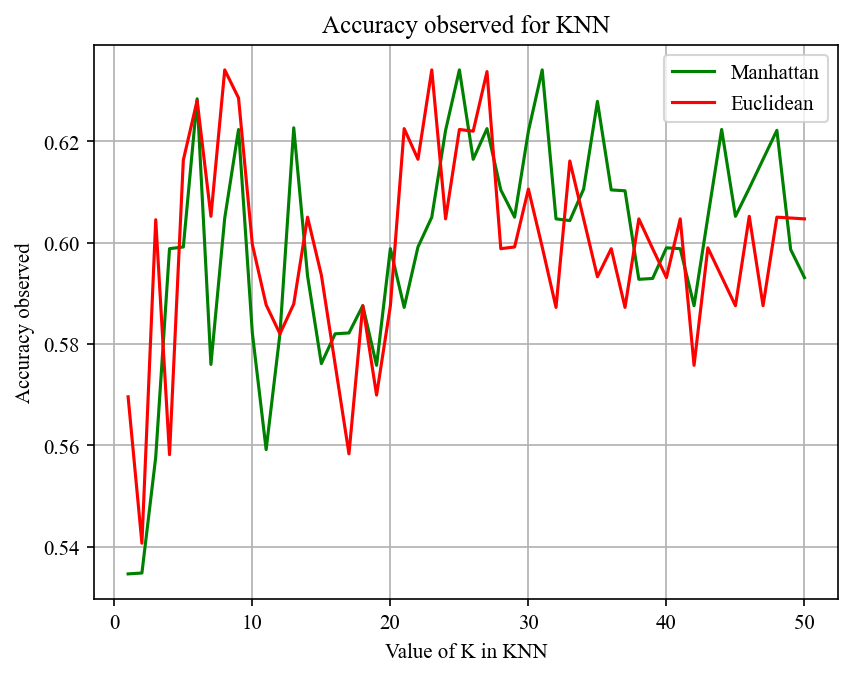

In [16]:
# Visualizing the results obtained
plt.figure(dpi=150)
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy observed')
plt.grid()
plt.plot(K, acc, label='Manhattan', color='green')  # Change color to green
plt.plot(K_, acc_, label='Euclidean', color='red')  # Keep the color as red
plt.title('Accuracy observed for KNN')
plt.legend()
plt.show()


In [17]:
acc.sort()
acc[-1]

0.6341176470588236

In [18]:
acc_.sort()
acc_[-1]

0.6341176470588236